# (Not only) Linear Models

### Deadline for this HW -- 22nd of November, 23:59 (Moscow time). Please send your Jupyter notebook to email: natalya.vasileva@hse.ru. 
* The final grading formula: $\min(10, T + B)$, where T is the sum of Task points and B is the sum of Bonus points. 
* It should contain all results printed. In other words, all cells must be "executed".
* The result must be reproduced during verification (in Python 3).
* If some code has not been run or is working out with errors, then the item is not graded.
* A task submitted after the deadline is not accepted. You can send an unfinished task, completed items will be evaluated.
* The task is performed independently. If some students are caught cheating, all of them will automatically receive 0 points for this work. If you have found some specific code on the Internet that you are going to borrow, be sure to indicate it in the task properly - for sure you are not the only one who will find and use this information.
* A fully correct and clean solution that does not fully uitilize numpy matrix operations is worth 90% of the  full point.
* To get the full point for task, the solution must be done using numpy matrix/vector operations in all performance-critical spots.
 * You can use python loops for utility things like iterating over possible values for $k$ parameter of KNN. Just avoid using python loops for processing huge data matrices, for doing matrix/vector operations for which numpy has standard functions.
* The evaluation will also take into account your conclusions from the experiments. Try to make a report/story which answers research questions from the task.

**Please name your file in the format "HW2_not_only_linear_models_Surname_Name.ipynb"**

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline
sns.set() # Pretty styles

from sklearn.datasets import make_classification, make_moons, make_gaussian_quantiles
from sklearn.svm import SVC


<a id='log_reg'></a>
## Logistic regression

Let's consider binary classification, where class labels are in the set $\{-1, 1\}$. 

The process of logistic regression learning could be written as:

$$ \dfrac{1}{N}\sum_{i=1}^N \log(1 + \exp(-y_i(\langle w, x_i \rangle + b))) + \dfrac{C}{2}\lVert w \rVert^2  \to \min_w$$

The learning process in this case is basically finding the vector of weights of the model $w$ and the constant $b$, which is performed using the Gradient Descent (GD) method.

During the gradient step we update the vector of weights according to the following formula:

$$w_{new} := w + \dfrac{\eta}{N}\sum_{i=1}^N y_ix_i \Big(1 - \dfrac{1}{1 + exp(-y_i(\langle w, x_i \rangle + b))}\Big) - \eta Cw$$

$$b_{new} := b + \dfrac{\eta}{N}\sum_{i=1}^N y_i \Big(1 - \dfrac{1}{1 + exp(-y_i(\langle w, x_i \rangle + b))}\Big)$$

$$(w, b) := (w_{new}, b_{new})$$

where $\eta > 0$ is a learning rate.

In general, the gradient descent method has the following disadvantages:
- staying in local minima;
- non-obvious choice of the stop criterion;
- learning rate choice;
- initial weights initialization.

### Task 1. Gradient Descent

#### Task 1.0 (0.25 points). Uploading and working with data 
- Download the dataset: X_train.csv, y_train.csv.
- For simplicity in this task, we will limit ourselves to working with numeric features only (Numeric in the MetaData.csv table).
- Fill in the missing values in the data. You may use find `sklearn.impute` or `pandas.DataFrame.fillna` usefull.
- Note that the class labels for this task should be from the set {-1, 1}, not {0, 1}.
- Optionally use any data preprocessing, your task is to achieve convergence and high quality of the resulting model.

**Data description**

The provided training sample is about patients' health. The outcomes mean the following: 0 — the patient has no complications, 1 — there are complications. According to known medical indicators, as well as genetic data about the patient, it is necessary to determine his condition.

In [2]:
df = pd.read_csv(r'C:\Users\310\Desktop\Progects_Py\ML-course-at-ICEF\data\HW_2\X_train.csv')
y_train = pd.read_csv(r'C:\Users\310\Desktop\Progects_Py\ML-course-at-ICEF\data\HW_2\y_train.csv')
meta_data = pd.read_csv(r'C:\Users\310\Desktop\Progects_Py\ML-course-at-ICEF\data\HW_2\MetaData.csv')

# Replace 0 to -1 in y lables 
y_train = y_train['label'].replace(0, -1)

In [3]:
# Select numeric features
num_features = meta_data.loc[meta_data['Column Type'] == 'Numeric', 'varnum']
df_num = df[num_features]

# Count and fill nan values
nan_count_per_column = df.isna().sum().sum()
print(f'nan values count: {nan_count_per_column}')

# Replace nans with the column mean
df_num = df_num.fillna(df.mean())

nan values count: 183663


In [4]:
df['V9'].value_counts()

V9
0.010101    617
0.020202    216
0.030303    110
0.000000     69
0.040404     58
0.050505     23
0.060606     20
0.101010      9
0.070707      8
0.080808      7
0.090909      2
0.151515      1
0.111111      1
0.202020      1
1.000000      1
Name: count, dtype: int64

In [5]:
df[['V9']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4099 entries, 0 to 4098
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V9      1143 non-null   float64
dtypes: float64(1)
memory usage: 32.2 KB


In [6]:
df.shape

(4099, 1330)

#### Task 1.1 (2.5 points).  GD implementation
Any ML course should include such task :)

Implement gradient descent and test it for the case of logistic regression on our medical data. To compare the quality of different approaches, use the value of the optimized logloss.

As a stop criterion use both of the following conditions:
 - the Euclidean norm of the difference between the current and new weights vectors has become less than 1e-4;
 - limit on the number of iterations (for example, 10000).

For the initial initialization of weights, you need to compare the following approaches:
 - zero initial initialization;
 - random.
 
#### Task 1.2 (1.5 points). GD experiments

Follow these steps and comment your results:
- Consider how the learning rate affects convergence (try at least 5 different values).
- Consider a regularized model (at least 5 different regularization coefficients), which is described above, as well as a model without a regularizer. Does regularization affects the convergence rate and quality (quality in all cases means the value of the original, unregularized functional)?
- Examine the quality of the optimized function depending on the iteration number (with proper implementation and a suitable step size, it should decrease).
- Does the choice of initial initialization of weights affect the convergence speed and quality?

At each point, you need to build the necessary speed / quality graphs and give exhaustive conclusions.

You may find `scipy.special` module usefull.

In [7]:
## here's just an example, you could make your own implementation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def logistic_loss(y, X, w, b, C):
    linear_term = y * (np.dot(X, w) + b)
    loss = np.mean(np.log(1 + np.exp(-linear_term))) + (C/2) * np.linalg.norm(w)**2   
    #np.log(1 + np.exp(-linear_term))
    #np.logaddexp(0, -linear_term)
    return loss

def logistic_grad(X, y, C=1.0, eta=0.0001, max_iter=10000, tol=1e-4, init='zero', patience=30):
    X = X.values if isinstance(X, pd.DataFrame) else X
    y = y.values if isinstance(y, pd.Series) else y

    N, d = X.shape

    best_loss = float('inf')

    #print("X shape:", X.shape)
    #print("y shape:", y.shape)

    if init == 'zero':
        w = np.zeros(d)
        b = 0
    elif init == 'random':
        np.random.seed(42)
        w = np.random.randn(d)
        b = np.random.randn()
    else:
        raise ValueError("Initialization must be 'zero' or 'random'.")
    
    losses = []

    iter_no_improve = 0
    cool_down = 0

    for iteration in range(max_iter):
        linear_term = y * (np.dot(X, w) + b)
        prob = sigmoid(linear_term)

        # Compute gradient
        grad_w = -np.dot((y * (1 - prob)), X) / N + C * w
        grad_b = -np.sum(y * (1 - prob)) / N

        # Update weights
        w_new = w - eta * grad_w
        b_new = b - eta * grad_b

        # Compute loss for current iter
        loss = logistic_loss(y, X, w, b, C)
        losses.append(loss)

        # Simple LR sheduler 
        if cool_down == 0:
            if abs(best_loss - loss) < 0.05:
                iter_no_improve += 1
            else:
                iter_no_improve = 0
        else: 
            cool_down -=1

        if iter_no_improve > patience:
            
            iter_no_improve = 0
            eta *= 0.5
            cool_down = 20


        best_loss = min(best_loss, loss)


        # Stop criteria
        if np.linalg.norm(w_new - w) < tol:
            print(f'Tolerance hitted')
            break

        w, b = w_new, b_new
    
    return w, b, losses

Tolerance hitted
Log-loss with zero initialization (final): 0.44134467485883216
Tolerance hitted
Log-loss with random initialization (final): 0.48119805662845094


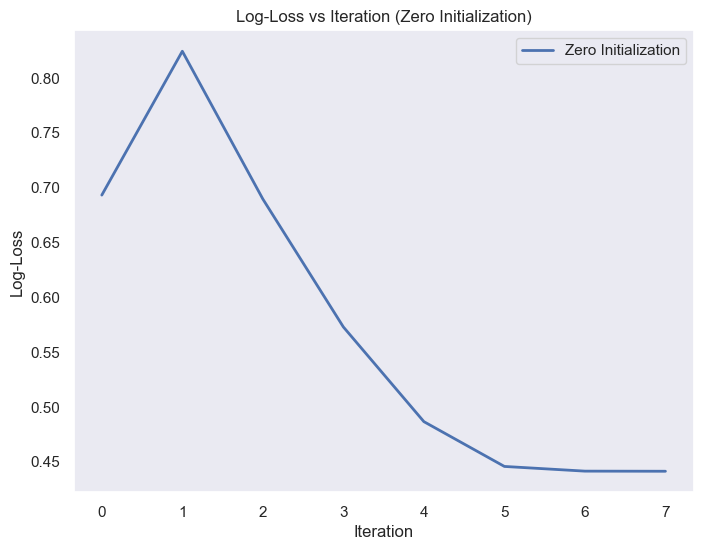

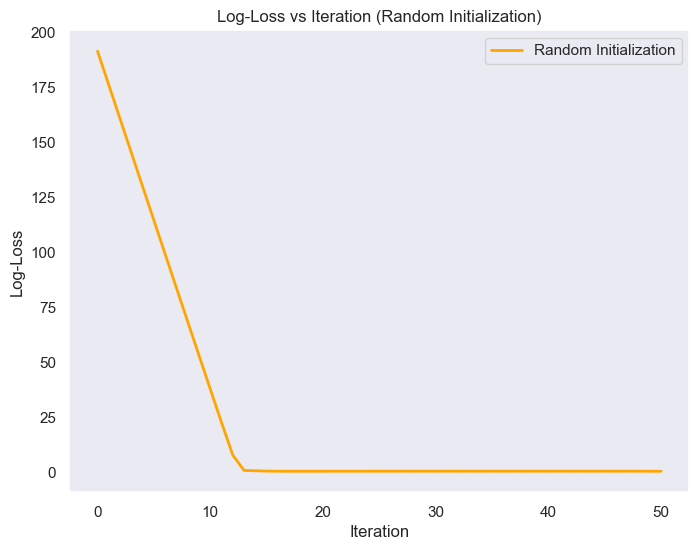

In [8]:
# Test gradient descent with zero initialization
w_zero, b_zero, losses_zero = logistic_grad(df_num, y_train, C=1, init='zero')
print("Log-loss with zero initialization (final):", losses_zero[-1])

# Test gradient descent with random initialization
w_random, b_random, losses_random = logistic_grad(df_num, y_train, eta=0.0001, C=0.001, init='random')
print("Log-loss with random initialization (final):", losses_random[-1])

# Plot for Zero Initialization
plt.figure(figsize=(8, 6))
plt.plot(losses_zero, label='Zero Initialization', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Log-Loss')
plt.title('Log-Loss vs Iteration (Zero Initialization)')
plt.legend()
plt.grid()
plt.show()

# Plot for Random Initialization
plt.figure(figsize=(8, 6))
plt.plot(losses_random, label='Random Initialization', linewidth=2, color='orange')
plt.xlabel('Iteration')
plt.ylabel('Log-Loss')
plt.title('Log-Loss vs Iteration (Random Initialization)')
plt.legend()
plt.grid()
plt.show()

- Interestingly zero init performing much better than random one, It showes faster and better convergence almost in all cases. 
- Learning rates cause the most significant affect after the init. Lr > 0.001 does not lead to any convergence. Init with zeros much more stabele to different LRs.
- C parametr (with reasonable values) does not affect convergence with zeros init but do affect random init. I found that the smaler the C the better is loss for ramnom init. With C=0 (no regularization) rndom init yields better fit then with zeros.


## Linear SVC

Let's denote the training sample $\{(x_n, y_n)\}_{n=1}^N$, where $N$ is the number of objects, $\boldsymbol x_n\in \mathbb{R}^d$ is the numeric vector of the feature description of the object, $y_n\in \{+1, -1\}$ — object class.

SVM trains the separating hyperplane model:
$$f(\boldsymbol x) = \boldsymbol w^T\boldsymbol x +b$$
The model parameters are the vector of weights $\boldsymbol w\in\mathbb{R}^d$ and the shift $b\in\mathbb{R}$.

The model is trained by solving the optimization problem:
$$
\begin{gather}
\frac{1}{2} \| \boldsymbol w \|^2 + C \sum_{n=1}^N \xi_n \to \min_{\boldsymbol w, \boldsymbol \xi, b} \\
\text{s.t.: } \quad y_n (\boldsymbol w^T \boldsymbol x_n + b) \geq 1 - \xi_n, \quad \xi_n \geq 0, \quad \forall n=1,\dots,N
\end{gather}
$$

Constraints of the form $y_n (\boldsymbol w^T\boldsymbol x_n + b) \geq 1$ require objects to be correctly classified by a separating hyperplane. Since the linear separability of the sample is not guaranteed in practice, variables $\xi_n$ (slack variables) are introduced, which weaken the constraints of correct classification. In the optimized functional, the term $\|\boldsymbol w\|^2$ penalizes the small width of the separating hyperplane, the sum of $\sum_n\xi_n$ penalizes the relaxation of restrictions.

After finding a solution to the optimization problem $(\boldsymbol w_{\star}, \boldsymbol \xi_{\star}, b_{\star})$, some of the constraints become _active_, i.e. they move to the "extreme position" — the exact equality:
$$\quad y_n (\boldsymbol w_{\star}^T \boldsymbol x_n + b_{\star}) = 1 - \xi_{\star,n}$$
The objects corresponding to the active constraints are called _support vectors_.

The hyperparameter $C$ sets the balance between the width of the margin and the errors allowed by the classifier. Note that $C$ is fixed before training and is not optimized together with the model parameters. This hyperparameter is responsible for the generalizing ability of the separating hyperplane, a high generalizing ability (corresponding to a large value of $C$) can lead to overfitting if the linear model describes the training examples well. When selecting the optimal hyperparameter $C$, it is necessary to evaluate the quality on a validation sample or using cross-validation. As a rule, for a specific task, it is not known in advance which order has the optimal value of the hyperparameter $C$, so it is better to sort through the values using a logarithmic grid, for example: $10^{-3}, 10^{-2}, \dots, 10^{5}$.

The peculiarity of this method is that it has a solution that can be found using quadratic programming. In this task, we will use an sklearn implementation.

#### Task 2.0 (0.25 points). Random data generation.

Generate three random two-dimensional samples for binary classification (at least 400 points each):
- with linearly separable classes;
- with well-separable classes, but not linearly;
- with poorly distinguishable classes according to the available features;

To generate a random sample, you can use the functions from the module [sklearn.datasets](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets ). Don't forget to fix the *random_state* parameter.

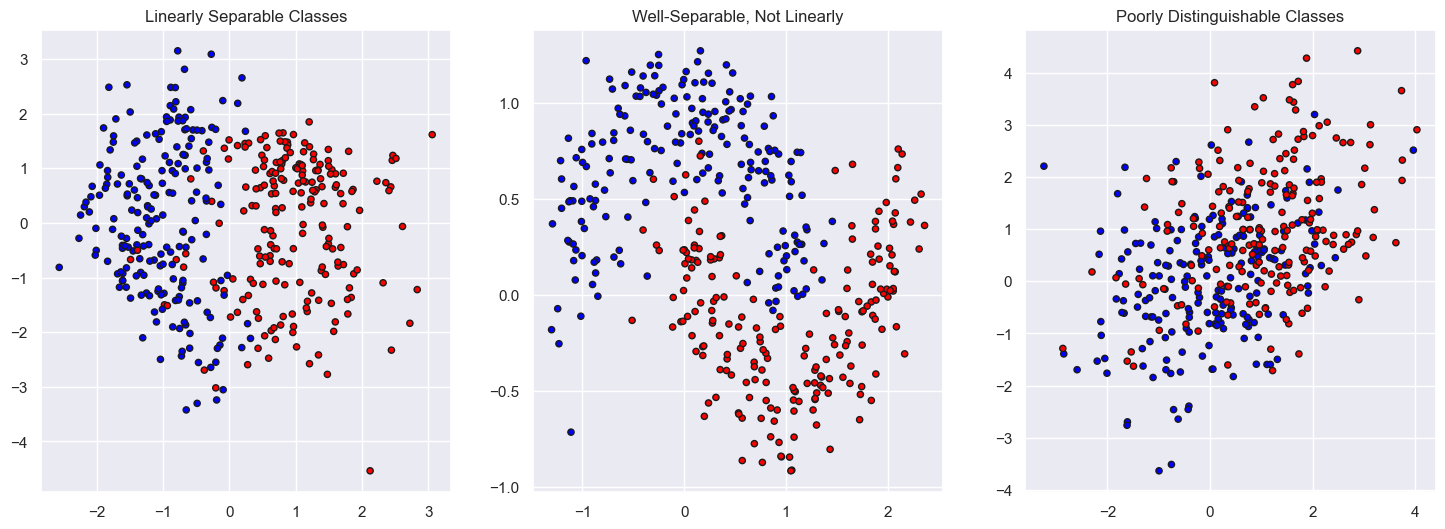

In [9]:
# Fix random_state for reproducibility
random_state = 42

# 1. Linearly Separable Classes
X_linear, y_linear = make_classification(
    n_samples=400, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=random_state
)

# 2. Well-Separable, Not Linearly Separable Classes
X_nonlinear, y_nonlinear = make_moons(n_samples=400, noise=0.2, random_state=random_state)

# 3. Poorly Distinguishable Classes
# Generate overlapping Gaussian distributions
np.random.seed(random_state)
n_samples_per_class = 200
mean_class_0 = [0, 0]
mean_class_1 = [1, 1]
cov = [[1.5, 0.5], [0.5, 1.5]]  # Covariance matrix

X_class_0 = np.random.multivariate_normal(mean_class_0, cov, n_samples_per_class)
X_class_1 = np.random.multivariate_normal(mean_class_1, cov, n_samples_per_class)

X_poor = np.vstack([X_class_0, X_class_1])
y_poor = np.hstack([np.zeros(n_samples_per_class), np.ones(n_samples_per_class)])

# Plot the datasets
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Linearly Separable
axs[0].scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, cmap='bwr', edgecolor='k', s=20)
axs[0].set_title("Linearly Separable Classes")

# Non-Linearly Separable
axs[1].scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c=y_nonlinear, cmap='bwr', edgecolor='k', s=20)
axs[1].set_title("Well-Separable, Not Linearly")

# Poorly Distinguishable
axs[2].scatter(X_poor[:, 0], X_poor[:, 1], c=y_poor, cmap='bwr', edgecolor='k', s=20)
axs[2].set_title("Poorly Distinguishable Classes")

plt.show()


#### Task 2.1 (0.75 points). Test the linear SVM on the generated samples.

Show on graphs the dividing hyperplane of SVM and the margin lines bounding the corridor $f(\boldsymbol x) = \pm 1$. Mark the support vectors with points of a different shape or larger size. See the example of linearly separable classes below.

Do this for different values of the parameter $C$ (at least 4).

How does the number of support vectors depend on the parameter $C$ for different samples?

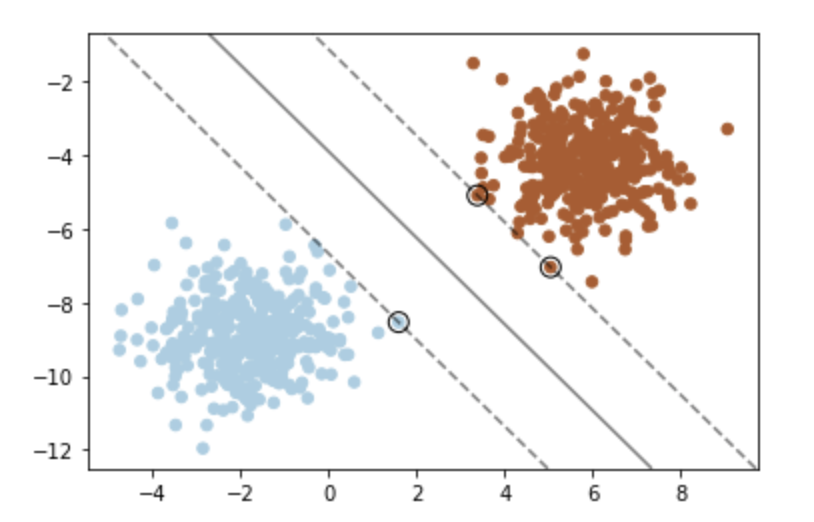

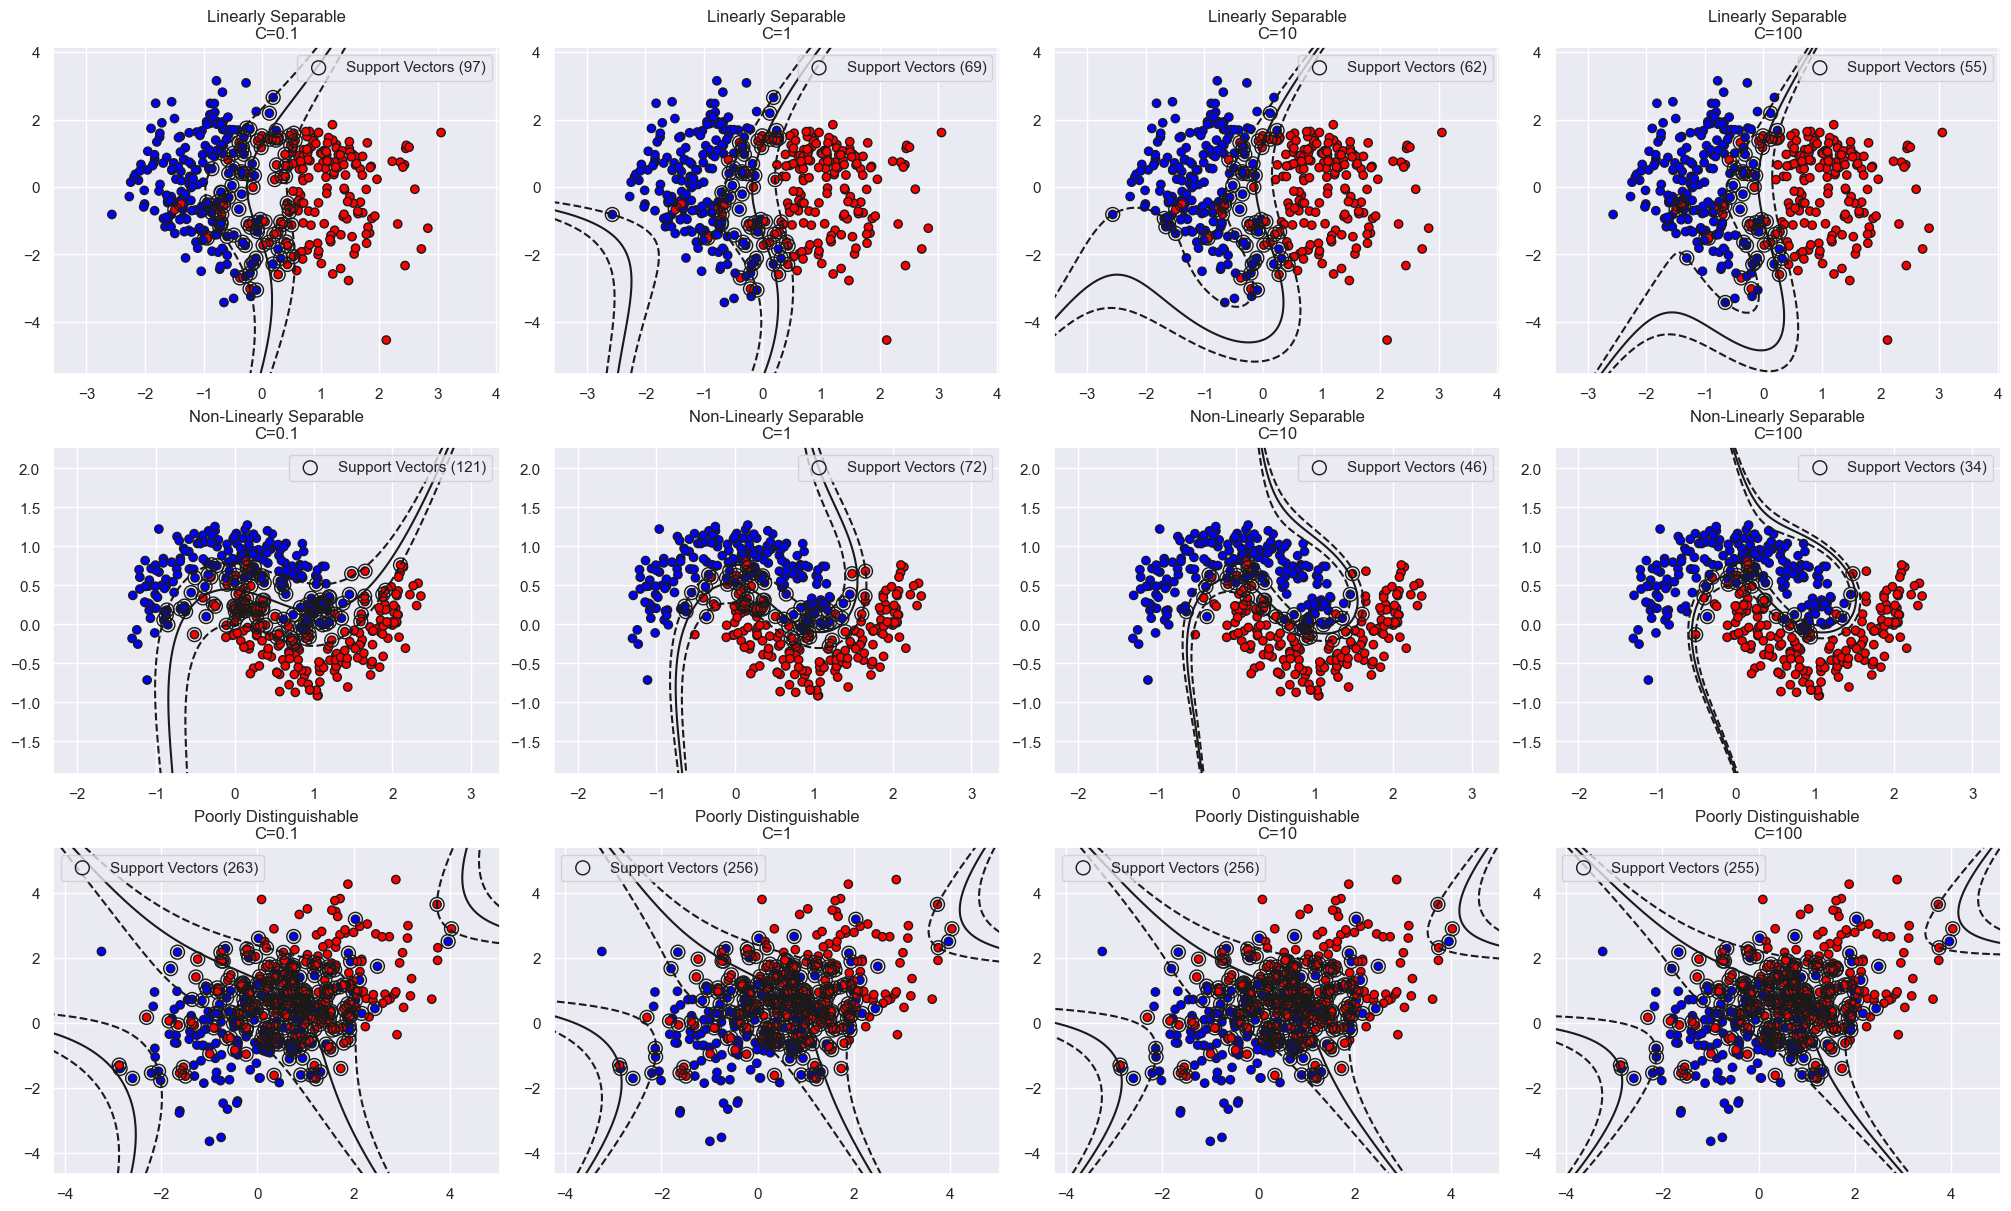

In [23]:
def plot_svm_decision_boundary(X, y, model, ax, title):
    """
    Plot the decision boundary, margin, and support vectors of the SVM model.
    """
    # Create a grid to evaluate the model
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # Predict on the grid
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    ax.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    
    # Highlight support vectors
    num_support_vectors = len(model.support_vectors_)
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, facecolors='none', edgecolors='k', 
               label=f'Support Vectors ({num_support_vectors})')

    ax.set_title(title)
    ax.legend()

# Parameters for SVM
C_values = [0.1, 1, 10, 100]

# Datasets to test
datasets = {
    "Linearly Separable": (X_linear, y_linear),
    "Non-Linearly Separable": (X_nonlinear, y_nonlinear),
    "Poorly Distinguishable": (X_poor, y_poor)
}

# Plot SVM for each dataset and each C value
fig, axs = plt.subplots(len(datasets), len(C_values), figsize=(20, 12), constrained_layout=True)

for row, (dataset_name, (X, y)) in enumerate(datasets.items()):
    for col, C in enumerate(C_values):
        # Train SVM model
        svm = SVC(kernel='poly', C=C, degree=3, coef0=1,)
        svm.fit(X, y)

        # Plot
        ax = axs[row, col]
        plot_svm_decision_boundary(X, y, svm, ax, title=f"{dataset_name}\nC={C}")

plt.show()


We can clearly see that number of support vectors in crease with respect to C because it it the parameter that set our tollerance to the trepassers. As it grows the num of trepassers grows.

- linearly separable classes are easely separated with linear kernel.
- Make_moons reqyire polinomial kernel with 3 degree of expansion plus coef0=1 to kontrole the balance of the polinomial terms.
- poorly distinguishable classes are poorly distinguished by any classification method 

## KNN Algorithm

In this task we will be implementing a K-Nearest Neighbors classifier step by step.

We will be using the [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) to test our implementation. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The task is to correctly classify plants based on their leaf measurements.

In [11]:
dataset = load_iris()
y = dataset['target']
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Implementing KNN

The idea behind K-Nearest Neighbors classifier is to classify an object based on $k$ most similar other objects in the training set. 

_The naive K-Nearest Neighbors algorithm._

It's a majority vote. If for some observation and $k=3$ the 3 closest objects have label $y=0$, then it's classified as $y=0$ as well. On the other hand, if 2 objects have labels $y = 1$ and 1 has label $y = 0$, the prediction is $y = 1$.

Given:
* Matrix of training features $X_{n \times p}$
* Vector of training labels $Y_{n\times 1}$
* Distance measure $d:\mathbb{R}^p\times\mathbb{R}^p \to\mathbb{R_{\ge 0}}$
* Number of neighbors $k\ge 1$
* Input vector $x'$ to predict a label for 

Algorithm:
1. For each observation in the training set $x_i \in X$, compute the distance $d(x_i, x')$.
2. Find $k$ nearest neighbors of $x'$: objects $x_1, x_2, \dots, x_k$ with the smallest distances to $x'$.
3. Find the mode (most occuring) label among the neighbor labels $mode(y_1, y_2, \dots, y_k)$

Done! The most frequent label among $k$ neighbors is the prediction of the algorithm.

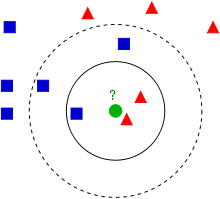

Image source: [wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

Note on breaking ties. In cases of even $k$ values or multi-class settings there could be ties. If $k=4$, $2$ nearest neighbors have a label of 0, the other $2$ neighbors have a label of 1, what is your prediction?

One of the ways to solve it is to decrease $k$ until a clear winner is found. There can be no tie at $k=1$, so it always works.

Note: it's "naive" because this algorithm is very inefficient. It's fine for small datasets, but for bigger datasets you don't want to compute distances to every single point every time. 

Which distance measures should we use?

There are multiple distance measures: Euclidean distance (also known as the l-2 norm), [Manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry), [Cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) (beware, this is a similarity, which increases when things get closer, instead of decreasing like a distance does) and many more.

Generally, you can experiment with different measures and find the best one for the task, the one that achieves the best results on the testing set.

Euclidean distance is a good starting point. For some $m$ sized vectors:
$$d(p, q) = \sqrt{\sum_{i=1}^{m} (p_i - q_i)^2}$$

#### Task 3.0 (0.5 point). Implement the euclidean distance measure

Implement it with mathematical numpy functions only! Using `numpy.linalg` is **forbidden**.

In [24]:
def euclidean_distance(p, q):
    """Computes the euclidean distance between p and q.

    Args:
        p: The first vector.
        q: The second vector.

    Returns:
        Euclidean distance between p and q

    """
    dist = np.sqrt(np.sum((p - q) ** 2))
    return dist


assert np.isclose(euclidean_distance(np.array([0, 1]), np.array([1, 0])), 1.41421)
assert euclidean_distance(np.array([0, 0]), np.array([0, 0])) == 0

#### Task 3.1 (0.5 point). Obtain the distances for a data point 
Obtain Euclidean distances from the first data point of the dataset to all others (query point included). 
Then find the 3 smallest distances.

In [26]:
X = df.drop('target', axis=1).values
Y = df['target'].values
x_1 = X[0]
x_1, y[0]

(array([5.1, 3.5, 1.4, 0.2]), 0.0)

In [27]:
def get_k_smallest(arr, k):
    """
    Args:
        arr: numpy array.
        k: number of smallest elements to return.

    Returns:
        Numpy array of k smallest elements of arr.
    """
    # Get indices of the k smallest values
    k_smallest_indices = np.argpartition(arr, k)[:k]
    # Retrieve the k smallest values
    k_smallest_values = arr[k_smallest_indices]
    # Sort the smallest values in ascending order
    k_smallest_values.sort()
    return k_smallest_values

def get_distances(x, X):
    """Computes a matrix of distances between vector x to all vectors of X

    Args:
        x: vector.
        X: matrix.

    Returns:
        Numpy array of distances
    """
    distances = np.array([euclidean_distance(x, X[i]) for i in range(len(X))])
    return distances


distances = get_distances(x_1, X)

assert len(distances) == len(X)

k_smallest_distances = get_k_smallest(distances, k=3)

assert len(k_smallest_distances) == 3
assert k_smallest_distances[0] == 0
assert np.isclose(k_smallest_distances[1], 0.1, atol=0.01)
assert np.isclose(k_smallest_distances[2], 0.141, atol=0.01)

#### Task 3.2 (0.5 point). Obtain the closest labels
In the last cell you have obtained the smallest distances. But what we really want for KNN is to obtain the labels of closest objects.

In the cells below, do just that. You can reuse the function from the previous cell, or make a new one that combines distance calculation and label retrieval. In the end you should obtain the indices, distances and labels of the $k$ nearest neighbors (objects with the smallest distances).

Hint: [np.argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html) might be very useful

In [28]:
def get_k_nearest_neighbors(x, X, Y, k):
    """
    Args:
        x: vector.
        X: matrix of features.
        Y: vector of labels.
        k: amount of nearest neighbors to return.

    Returns:
        indices: indices of k nearest neighbors.
        distances: distance from x to each nearest neighbor.
        labels: labels of k nearest neighbors.
    """
    # Compute distances from x to all points in X
    distances = np.array([euclidean_distance(x, X[i]) for i in range(len(X))])

    # Get indices of the k smallest distances
    indices = np.argsort(distances)[:k]

    # Retrieve the k smallest distances and corresponding labels
    k_smallest_distances = distances[indices]
    k_smallest_labels = Y[indices]

    return indices, k_smallest_distances, k_smallest_labels

indices, distances, labels = get_k_nearest_neighbors(x_1, X, Y, k=3)

assert len(distances) == len(indices) == len(labels) == 3
assert indices[0] == 0
assert distances[0] == 0
assert np.isclose(distances[1], 0.1, atol=0.01)
assert np.isclose(distances[2], 0.141, atol=0.01)
assert list(labels) == [0, 0, 0]


#### Task 3.3 (0.5 point): Finally, KNN classifier!

Now we have all the building blocks for a K-Nearest Neighbors classifier.

Use the vectors from `train_X` and labels from `train_Y` to classify every vector from `test_X`. Use $k=3$ for now.

Then compute the [accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy) score using labels from `test_Y`. 
(It would be better to use [balanced accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html), because we have 3 classes, but they output equivalent values in our case).

Think for a moment: it's generally not advised to use accuracy as a quality measure in multiple-class classification problems (why?). Why is it okay to use accuracy with this dataset? 

In [30]:
# Never test on the training set, remember?
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, random_state=42, test_size=0.5)

In [31]:

def knn_predict(x, train_X, train_Y, k):
    """
    Predict the label for a single vector x using K-Nearest Neighbors.

    Args:
        x: Vector to classify.
        train_X: Training feature matrix.
        train_Y: Training labels.
        k: Number of neighbors to consider.

    Returns:
        Predicted label for x.
    """
    # Get the k nearest neighbors
    _, _, k_nearest_labels = get_k_nearest_neighbors(x, train_X, train_Y, k)
    
    # Get the most common label (majority vote)
    (values, counts) = np.unique(k_nearest_labels, return_counts=True)
    majority_label = values[np.argmax(counts)]
    
    return majority_label

In [32]:
k = 3
predictions = np.array([knn_predict(x, train_X, train_Y, k) for x in test_X])

score = accuracy_score(predictions, test_Y)
print(score)

0.9733333333333334


#### Task 3.4 (0.5 point): Scaling
KNN performance is heavily degraded if different features have different scales. If feature 1 is on a range of -100 ... 100, and feature 2 is on a range of 0 ... 1, KNN will have a hard time. This is common for many ML algorithms. Stop for a moment to think about why this happens.

This is might be a problem with this dataset. You can see it by plotting any two features against each other: all features have different scales. But it might turn out that scaling doesn't bring any improvement.

In the cells below, implement a function that scales each feature column in the matrix $X$ to have a standard deviation of $1$ and mean $0$, also known as [Standard Scaling](https://en.wikipedia.org/wiki/Standard_score) or Z-score normalization. Use only numpy.

In [ ]:
plt.figure()
sns.scatterplot(df[df.columns[0]], df[df.columns[1]])
plt.show()

In [33]:
def get_scaling_params(matrix):
    """
    Args:
        matrix: matrix.

    Returns:
        means: numpy array of means values of matrix columns. 
        variances: numpy array of variances values of matrix columns. 
    """

    means = np.mean(matrix, axis=0)
    variances = np.var(matrix, axis=0)
    return means, variances

def standartize(matrix, means, variances):
    """Applies standard scaling to the matrix.

    Args:
        matrix: matrix.
        means: numpy array of means of matrix columns. 
        variances: numpy array of variances of matrix columns. 
    Returns:
        matrix with each column having a mean of zero and a variance of 1.
    """

    scaled_matrix = (matrix - means) / np.sqrt(variances)
    return scaled_matrix


means, variances = get_scaling_params(X)
X_scaled = standartize(X, means, variances)
assert np.isclose(X_scaled.mean(axis=0), 0).all()
assert np.isclose(X_scaled.std(axis=0), 1).all()

In [34]:
# Do not scale the source X and then split.
# You don't want information from the test set leaking into the train set. Be careful!
# Treat test_X as if you don't know it at training time

means, variances = get_scaling_params(train_X)
train_X_scaled = standartize(train_X, means, variances)

# We use means and variances obtained from train_X to scale test_X, 
# because we can't use parameters from test for preprocessing our data. 
# Just as if we didn't know test_X at all!
test_X_scaled = standartize(test_X, means, variances) 

predictions = np.array([knn_predict(x, train_X_scaled, train_Y, k=3) for x in test_X_scaled])
score = accuracy_score(predictions, test_Y)

print('Accuracy after scaling', score)

Accuracy after scaling 0.96


Think for a moment, does scaling improve the score in this case?

Accuracy actually decreased here possibly due to the fact that petal length and petal width are the most imformative and contain more variation. After the scaling we lose some part of variation that contributes to discreminative power of the model

#### Task 3.5 (Not graded). Comparing your implementation to sklearn

**Ungraded**, but you can use this for checking if your solution is correct

`%%time` allows us to see the runtime of a cell.

In [35]:
%%time
# Let's compare it to sklearn
skl_accuracy = accuracy_score(KNeighborsClassifier(n_neighbors=3, algorithm='brute', metric='euclidean').fit(train_X, train_Y).predict(test_X), test_Y)
print('Accuracy', skl_accuracy)

Accuracy 0.9733333333333334
CPU times: total: 203 ms
Wall time: 372 ms


In [36]:
%%time
# Run your knn here
k = 3
predictions = np.array([knn_predict(x, train_X, train_Y, k) for x in test_X])

score = accuracy_score(predictions, test_Y)
print(score)
your_accuracy = score

0.9733333333333334
CPU times: total: 62.5 ms
Wall time: 101 ms


In [37]:
assert abs(your_accuracy  - skl_accuracy) <= 0.1

Your implementation will probably be significantly slower than the sklearn one. This is okay. It should be fairly close in terms of accuracy though.

Not that time)))

#### Task 3.6 (1 point): OOP implementation

Did you notice how all sklearn models have very convenient `.fit` and `.predict` methods to them? That's because sklearn models are objects with a unified *interface*, which is super cool. It allows people to have a good time when interacting with the code: maybe you never used a model, but you expect it to have `.fit` and `.predict` methods.

You can do it too! In the following cell, convert your implementation to an object-oriented one.

In [38]:
class NaiveKNNClassifier:
    def __init__(self, k=3):
        """
        Args:
            k: number of nearest neighbors.
        Returns: 
            None
        """
        self.k = k
        self.train_X = None
        self.train_y = None

    def fit(self, X, y):
        """Trains the previously initiated classifier.

        Args:
            X: features matrix.
            y: vector of training labels.
        Returns:
            None
        """
        self.train_X = X
        self.train_y = y
    
    def _get_k_nearest_neighbors(self, x):
        """
        Helper function to get k nearest neighbors for a given input x.
        
        Args:
            x: A single input vector.
        
        Returns:
            The most common label among the k nearest neighbors.
        """
        # Calculate all distances from x to training set
        distances = np.array([np.sqrt(np.sum((x - self.train_X[i]) ** 2)) for i in range(len(self.train_X))])
        
        # Get indices of k smallest distances
        k_nearest_indices = np.argsort(distances)[:self.k]
        
        # Retrieve the labels of the k nearest neighbors
        k_nearest_labels = self.train_y[k_nearest_indices]
        
        # Majority vote for the most common label
        values, counts = np.unique(k_nearest_labels, return_counts=True)
        majority_label = values[np.argmax(counts)]
        
        return majority_label


    def predict(self, X):
        """Predicts

        Args:
            X: features matrix to predict for.
        Returns:
            Vector of predicted labels, must have the same first dimension as X.
        """
        predictions = [self._get_k_nearest_neighbors(x) for x in X]
        return np.array(predictions)


model = NaiveKNNClassifier(k=3)
model.fit(train_X, train_Y)
predictions = model.predict(test_X)
score = accuracy_score(predictions, test_Y)
score

0.9733333333333334

How to check: you should get the same score as you did before, and it should be very close to the sklearn model score.

#### Task 3.7 (1.25 point). Choosing the best K

KNN performance is heavily dependent on choosing the right $k$ value. It's different for each dataset though. Try to find the best $k$ for this dataset by computing a score for different values of $k$ and visualizing the results with a plot.
1. Plot the accuracy scores for each $k$ value from 1 to 10.
2. Output the best obtained accuracy and the best $k$ value.

Side note: the best k value might be dependent not only on the dataset, but also on the choosen split. A more robust result can be obtained by rerunning the experiment multiple times for different generated train/test splits. This is optional for the task and does not affect the grade.

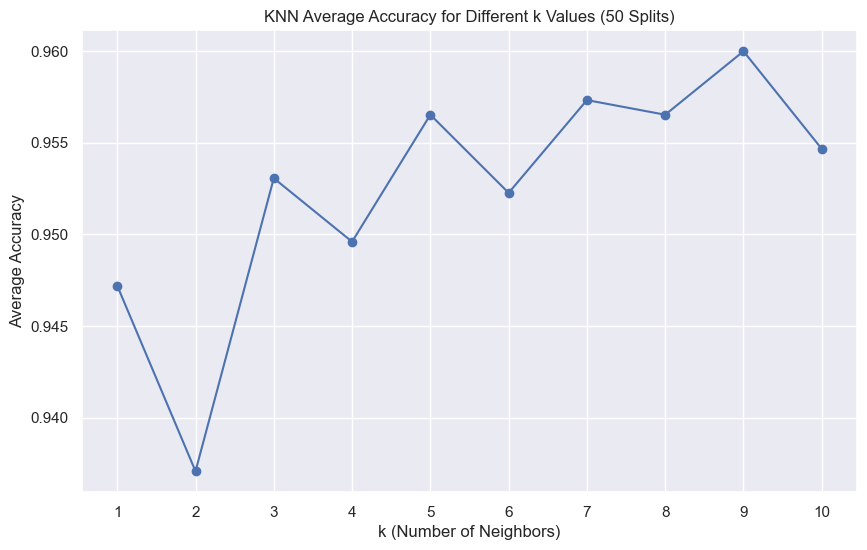

Best average accuracy: 0.96
Best k value: 9


In [43]:
# Number of splits and k values to evaluate
num_splits = 50
k_values = range(1, 11)

# Store accuracies for each k across splits
all_accuracies = {k: [] for k in k_values}

# Perform experiments across multiple splits
for split in range(num_splits):

    # Split data into train and test sets
    train_X, test_X, train_Y, test_Y = train_test_split(X, Y, random_state=split, test_size=0.5)
    
    # Test different k values
    for k in k_values:
        # Initialize and train the KNN model
        model = NaiveKNNClassifier(k=k)
        model.fit(train_X, train_Y)
        
        # Predict and calculate accuracy
        predictions = model.predict(test_X)
        accuracy = accuracy_score(test_Y, predictions)
        
        # Store the accuracy for this k
        all_accuracies[k].append(accuracy)

# Compute average accuracy for each k value across all splits
average_accuracies = {k: np.mean(all_accuracies[k]) for k in k_values}

# Find the best k and best average accuracy
best_k = max(average_accuracies, key=average_accuracies.get)
best_accuracy = average_accuracies[best_k]

# Plot average accuracy scores for each k value
plt.figure(figsize=(10, 6))
plt.plot(k_values, [average_accuracies[k] for k in k_values], marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Average Accuracy')
plt.title('KNN Average Accuracy for Different k Values (50 Splits)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Output the best accuracy and best k value
print(f"Best average accuracy: {best_accuracy}")
print(f"Best k value: {best_k}")

## Bonus tasks

#### Bonus task 1 (2 points). Confidence is always attractive

KNN can return a kind of probability estimate when predicting, which can be used as a confidence measure. Confidence is a measure of how "sure" the model is in it's prediction. The higher it is, the more certain the model is. Systematically overconfident or underconfident models are bad, because if our model is always confident even when it's wrong, we can't really trust this confidence measure. A good model has *just right* confidence, calibrated with reality.

How do we measure how calibrated our model is with reality?

To put it simply, predictions with 70% confidence should be correct 70% of the time. Same for any other percentage. 

We can plot a [calibration plot](https://scikit-learn.org/stable/modules/calibration.html) to visualize the predicted probabilities:



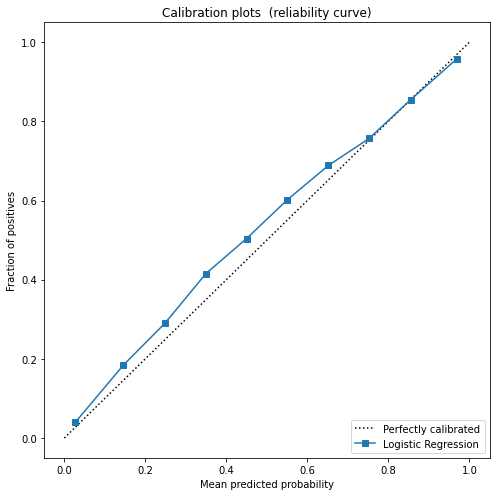

Side note: if you want a numeric measure of calibration, there is something called Expected Calibration Error. Just know that it exists for now.


Let's just implement probabilities for KNN. It's really simple.

$$a \ kind \ of \ probability = \frac{number \ of \ neighbors \  with \ the \ same \ label \  as \ predicted}{K}$$

If for some $x$ the predicted label is $y_0$ and all the nearest neighbors have label $y_0$, then the model is 100% confident ($confidence = K/K$). If 3 out of 5 nearest neighbors have the predicted label the model is $3/5$ confident).

In the following cell, **modify your implementation to output confidence/probability values alongside each prediction** (if you completed the OOP implementation task, add a `predict_proba` method that returns probabilities instead of labels). Then, compute probabilities for all predictions on the test set and **visualize the results with a calibration plot** ([here's a code example](https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html)). [sklearn.calibration.calibration_curve](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html) is all you need, basically.

There Iris dataset has multiple classes. Please provide only **one calibration plot**, for one of the classes. For example, you can plot the probabilities for class `0`.

#### Bonus task 2 (0.01 points). Add any picture/video/gif describing your experience of doing this homework